## Car Price Prediction

In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from jupyterthemes import jtplot
jtplot.style(theme='monokai',context='notebook',ticks=True,grid=False)
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot


In [14]:
df=pd.read_csv("E:\Project Data\London Housing\Cars_dataset.csv")
df

Make                    Model   Type  Origin DriveTrain     MSRP  \
0    Acura                      MDX    SUV    Asia        All  $36,945   
1    Acura           RSX Type S 2dr  Sedan    Asia      Front  $23,820   
2    Acura                  TSX 4dr  Sedan    Asia      Front  $26,990   
3    Acura                   TL 4dr  Sedan    Asia      Front  $33,195   
4    Acura               3.5 RL 4dr  Sedan    Asia      Front  $43,755   
..     ...                      ...    ...     ...        ...      ...   
423  Volvo  C70 LPT convertible 2dr  Sedan  Europe      Front  $40,565   
424  Volvo  C70 HPT convertible 2dr  Sedan  Europe      Front  $42,565   
425  Volvo               S80 T6 4dr  Sedan  Europe      Front  $45,210   
426  Volvo                      V40  Wagon  Europe      Front  $26,135   
427  Volvo                     XC70  Wagon  Europe        All  $35,145   

     EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
0           3.5        6.0         265        17           23    4451   
1           2.0        4.0         200        24           31    2778   
2           2.4        4.0         200        22           29    3230   
3           3.2        6.0         270        20           28    3575   
4           3.5        6.0         225        18           24    3880   
..          ...        ...         ...       ...          ...     ...   
423         2.4        5.0         197        21           28    3450   
424         2.3        5.0         242        20           26    3450   
425         2.9        6.0         268        19           26    3653   
426         1.9        4.0         170        22           29    2822   
427         2.5        5.0         208        20           27    3823   

     Wheelbase  Length  
0          106     189  
1          101     172  
2          105     183  
3          108     186  
4          115     197  
..         ...     ...  
423        105     186  
424        105     186  
425        110     190  
426        101     180  
427        109     186  

[428 rows x 14 columns]

In [24]:
df.shape
df.columns
df.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP            object
EngineSize     float64
Cylinders      float64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

In [22]:
df.isnull()
df.isnull().sum()
df=df.dropna()
df.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [28]:
df['Make'].unique()
df['Make']
df['MSRP']

0      $36,945
1      $23,820
2      $26,990
3      $33,195
4      $43,755
        ...   
423    $40,565
424    $42,565
425    $45,210
426    $26,135
427    $35,145
Name: MSRP, Length: 426, dtype: object

### Replace vales in 'MSRS" column '$' and ',' 

In [ ]:
df['MSRP']=df['MSRP'].str.replace('$','')
df['MSRP']=df['MSRP'].str.replace(',','')
df['MSRP']=df['MSRP'].astype('int')


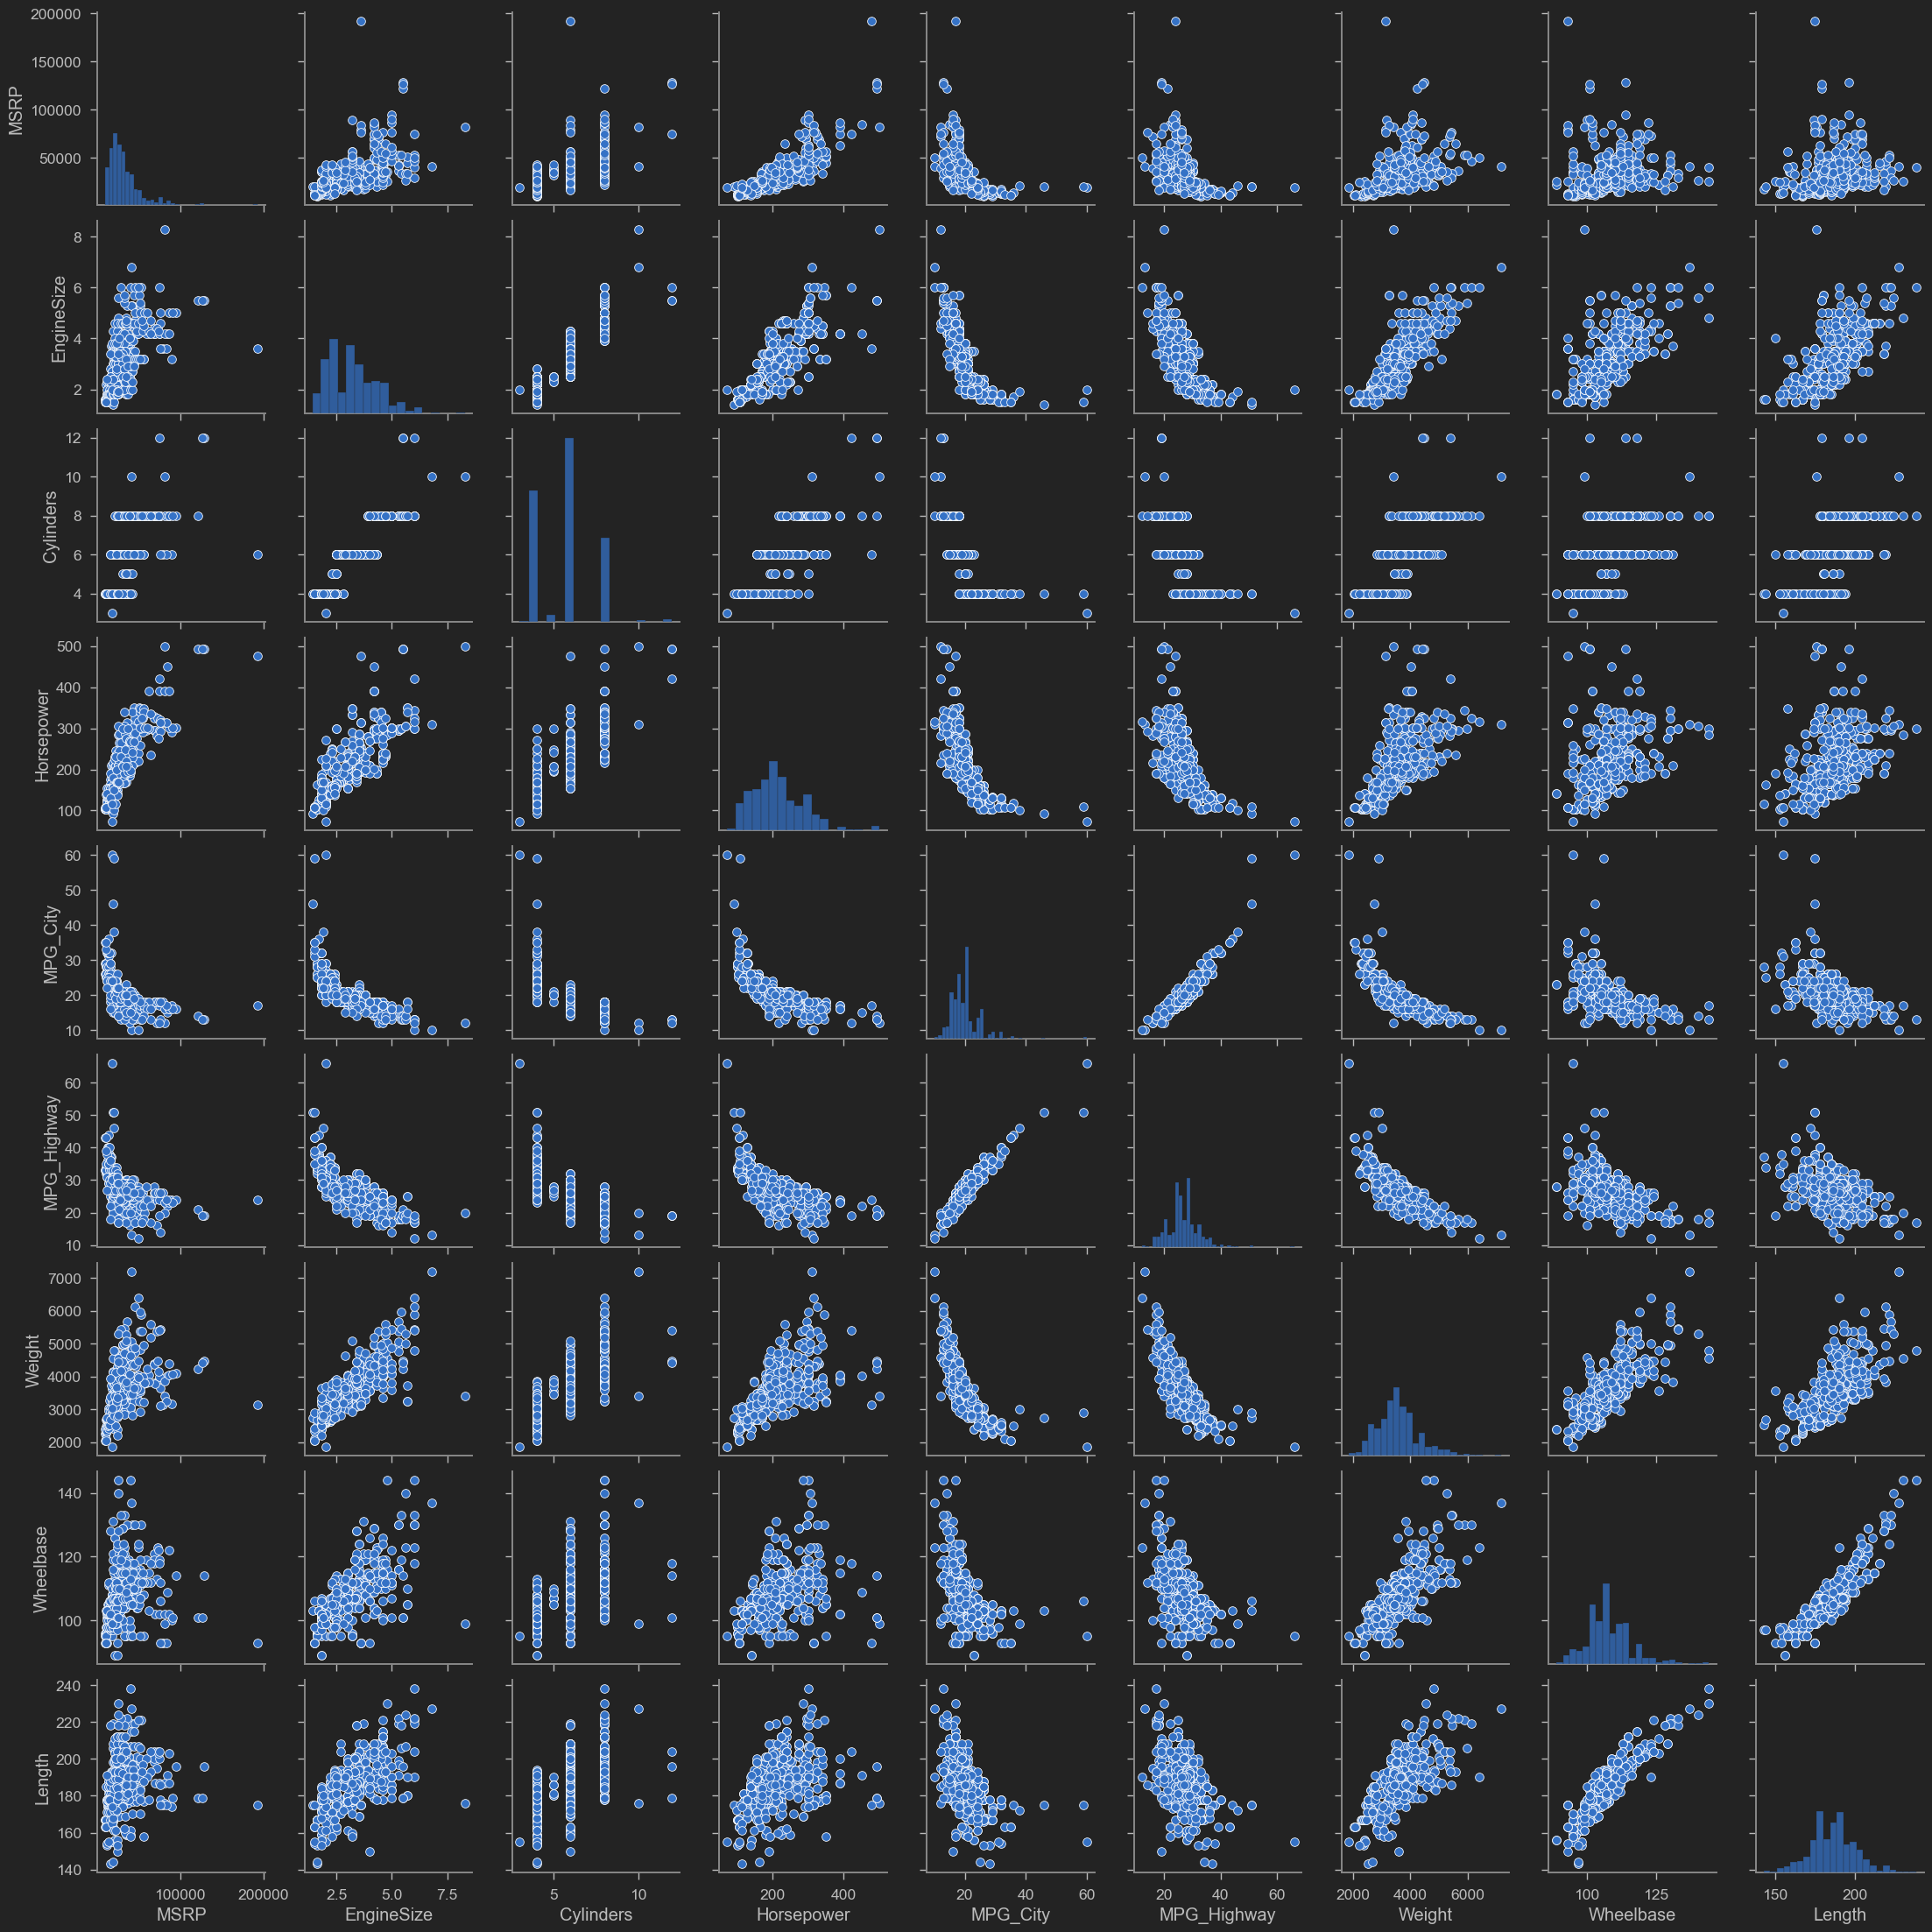

In [41]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(df)

In [42]:
df.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'EngineSize',
       'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight',
       'Wheelbase', 'Length'],
      dtype='object')

In [43]:
df.Make.unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hummer', 'Hyundai',
       'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover',
       'Lexus', 'Lincoln', 'MINI', 'Mazda', 'Mercedes-Benz', 'Mercury',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Pontiac', 'Porsche', 'Saab',
       'Saturn', 'Scion', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

### Use Plotly for figure 

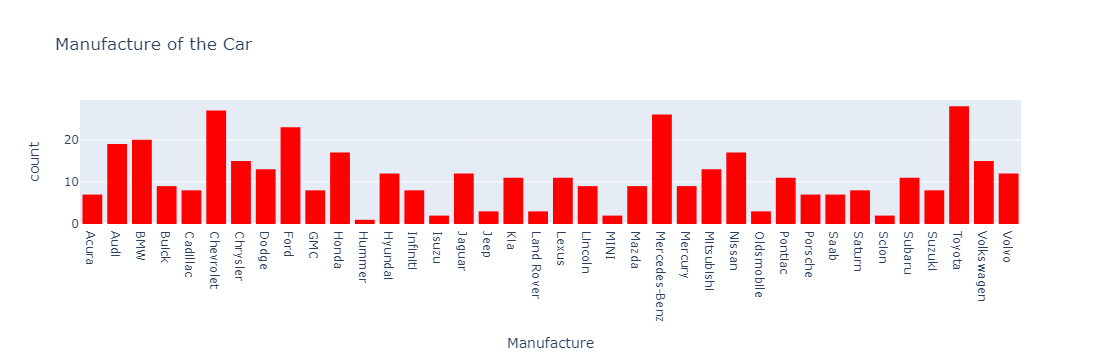

In [45]:
fig=px.histogram(df,x='Make',labels={'Make':'Manufacture'},title='Manufacture of the Car',color_discrete_sequence=['red'])
fig.show()
                 

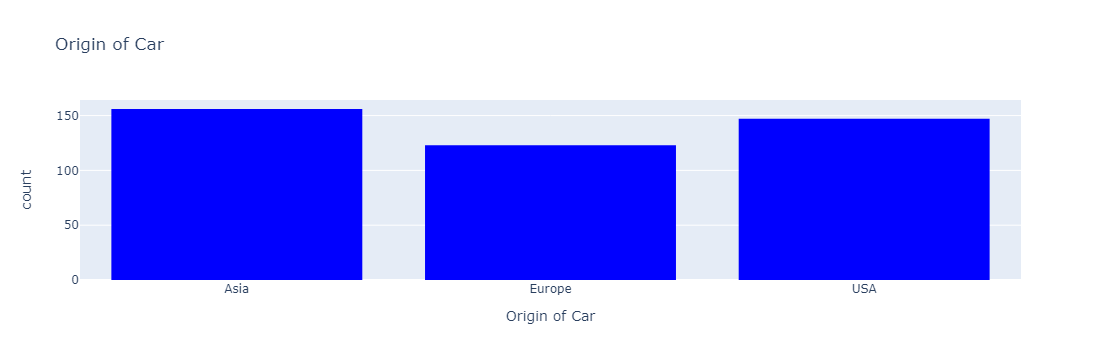

In [47]:
fig=px.histogram(df,x='Origin',labels={'Origin':'Origin of Car'},title='Origin of Car',color_discrete_sequence=['blue'])
fig.show()
            

### Correlation 

In [52]:
df.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'EngineSize',
       'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight',
       'Wheelbase', 'Length'],
      dtype='object')

In [60]:
# Only Int value 
df_num = df.select_dtypes(include=['number'])
df_num
df_num.corr()

MSRP  EngineSize  Cylinders  Horsepower  MPG_City  \
MSRP         1.000000    0.573238   0.649742    0.827296 -0.475916   
EngineSize   0.573238    1.000000   0.908002    0.793250 -0.717860   
Cylinders    0.649742    0.908002   1.000000    0.810341 -0.684402   
Horsepower   0.827296    0.793250   0.810341    1.000000 -0.677034   
MPG_City    -0.475916   -0.717860  -0.684402   -0.677034  1.000000   
MPG_Highway -0.440523   -0.725901  -0.676100   -0.647425  0.940993   
Weight       0.447987    0.808707   0.742209    0.631758 -0.740418   
Wheelbase    0.151665    0.638947   0.546730    0.387561 -0.508029   
Length       0.171060    0.636015   0.547783    0.382386 -0.504184   

             MPG_Highway    Weight  Wheelbase    Length  
MSRP           -0.440523  0.447987   0.151665  0.171060  
EngineSize     -0.725901  0.808707   0.638947  0.636015  
Cylinders      -0.676100  0.742209   0.546730  0.547783  
Horsepower     -0.647425  0.631758   0.387561  0.382386  
MPG_City        0.940993 -0.740418  -0.508029 -0.504184  
MPG_Highway     1.000000 -0.793615  -0.525457 -0.468756  
Weight         -0.793615  1.000000   0.760857  0.689168  
Wheelbase      -0.525457  0.760857   1.000000  0.889838  
Length         -0.468756  0.689168   0.889838  1.000000

### Use Heatmap 

<Axes: >

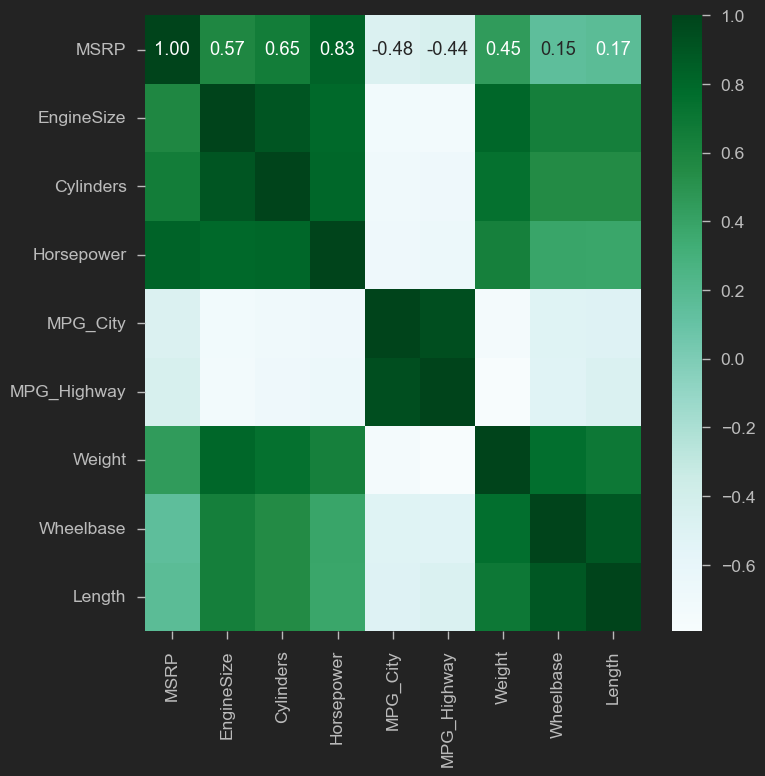

In [72]:
plt.figure(figsize=(8,8))
#sns.heatmap(df_num.corr(),cmap="BuGn",annot=True)
sns.heatmap(df_num.corr(), cmap="BuGn", annot=True, fmt=".2f")


In [77]:
df.columns
#df.info()

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'EngineSize',
       'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight',
       'Wheelbase', 'Length'],
      dtype='object')

### Create New Dumy dataset

In [79]:
df_new=pd.get_dummies(df,columns=['Make', 'Model', 'Type', 'Origin', 'DriveTrain'])
df_new.head(5)

MSRP  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
0  36945         3.5        6.0         265        17           23    4451   
1  23820         2.0        4.0         200        24           31    2778   
2  26990         2.4        4.0         200        22           29    3230   
3  33195         3.2        6.0         270        20           28    3575   
4  43755         3.5        6.0         225        18           24    3880   

   Wheelbase  Length  Make_Acura  ...  Type_Sedan  Type_Sports  Type_Truck  \
0        106     189        True  ...       False        False       False   
1        101     172        True  ...        True        False       False   
2        105     183        True  ...        True        False       False   
3        108     186        True  ...        True        False       False   
4        115     197        True  ...        True        False       False   

   Type_Wagon  Origin_Asia  Origin_Europe  Origin_USA  DriveTrain_All  \
0       False         True          False       False            True   
1       False         True          False       False           False   
2       False         True          False       False           False   
3       False         True          False       False           False   
4       False         True          False       False           False   

   DriveTrain_Front  DriveTrain_Rear  
0             False            False  
1              True            False  
2              True            False  
3              True            False  
4              True            False  

[5 rows x 482 columns]

In [80]:
df_new.shape

(426, 482)

### We drop The column 'MSRP' It's used in Target(Its Target Variable).

In [84]:
X=df_new.drop('MSRP',axis=1)
X
y=df_new['MSRP']
y

0      36945
1      23820
2      26990
3      33195
4      43755
       ...  
423    40565
424    42565
425    45210
426    26135
427    35145
Name: MSRP, Length: 426, dtype: int32

In [86]:
X=np.array(X)
y=np.array(y)
X

array([[3.5, 6.0, 265, ..., True, False, False],
       [2.0, 4.0, 200, ..., False, True, False],
       [2.4, 4.0, 200, ..., False, True, False],
       ...,
       [2.9, 6.0, 268, ..., False, True, False],
       [1.9, 4.0, 170, ..., False, True, False],
       [2.5, 5.0, 208, ..., True, False, False]], dtype=object)

### Train Model

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=1)

## Linear Regression

In [90]:
from sklearn.linear_model import LinearRegression

linear_model=LinearRegression()
linear_model.fit(X_train,y_train)
linear_model.score(X_test,y_test)

0.6351489553201993

In [ ]:
#[ 0.6351489553201993 means 63% Accuracy ]

## Decision Tree Regression

In [91]:
from sklearn.tree import DecisionTreeRegressor

Dec_model= DecisionTreeRegressor()
Dec_model.fit(X_train,y_train)
Dec_model.score(X_test,y_test)

0.5884875890798478

In [ ]:
#[0.5884875890798478 means 58% Accuracy]

## Random Forest Regression

In [92]:
from sklearn.ensemble import RandomForestRegressor

Random_model= RandomForestRegressor()
Random_model.fit(X_train,y_train)
Random_model.score(X_test,y_test)

0.8001109981241065

In [ ]:
#[0.8001109981241065 means 80% Accuracy]

## XGBoost Regression

In [99]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(X_train,y_train)
xgb_model.score(X_test,y_test)

0.7931646497729368

In [ ]:
#[0.7931646497729368 means 79% Accuracy]